# K - Means Clustering

<a href="https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm">K means Clustering</a> is an **Unsupervised** Learning Algorithm. This means that, in practice, we do not **know** the desired response for each observation. Unsupervised methods tend to focus more on finding relationships in the data, rather than optimizing for a specific set of outcomes.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import sqrt

In [2]:
df=pd.read_csv("data.csv")
df.head()

,V1,V2
0,2.373546,3.183643
1,2.164371,4.595281
2,3.329508,2.179532
3,3.487429,3.738325
4,3.575781,2.694612


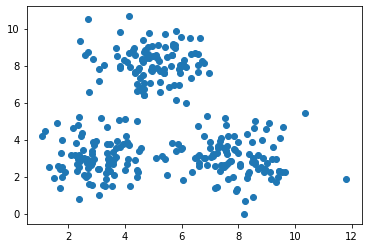

In [3]:
plt.scatter(df["V1"], df["V2"])
plt.show()

# The Algorithm

<ol>
<li>Decide how many k clusters we want the algorithm to partition.</li>
<li>Assign each point to a random cluster.</li>
<li>Calculate the centorid for each cluster.</li>
<li>Assign each point to the cluster that has the <a href="https://en.wikipedia.org/wiki/Euclidean_distance#:~:text=In%20mathematics%2C%20the%20Euclidean%20distance,being%20called%20the%20Pythagorean%20distance.">closest centroid</a>.</li>
<li>Repeat steps 3, 4 until until convergence, which means that no new points are updated to a different cluster.</li>
</ol>

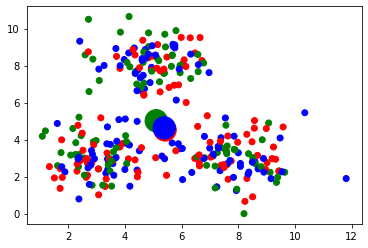

In [4]:
assignments = np.random.choice([1,2,3], size=len(df), replace=True, p=None)
centroids = [np.mean(df[level==assignments]) for level in [1,2,3]]

def plot_graph(assignments,centroids):
    centroids=pd.DataFrame(centroids,columns=["V1","V2"])
    plt.scatter(df["V1"], df["V2"],color=[(['r','g','b'])[i] for i in (assignments-1)])
    plt.scatter(centroids["V1"], centroids["V2"],color=['r','g','b'],s=500)
    plt.show()
plot_graph(assignments,centroids)

We can see that each point has been randomly assigned to a cluster.  
Before we can start the algorithm, we need a way to calculate the Euclidean distances.

In [5]:
#This function finds the distance from a single point to all 3 centroids.
def distances(point,centroids):
    return centroids.T.apply(lambda centroid: sqrt(np.sum([(centroid.V1-point.V1)**2,(centroid.V2-point.V2)**2])) )



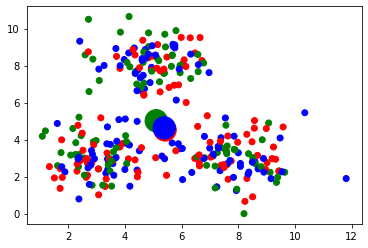

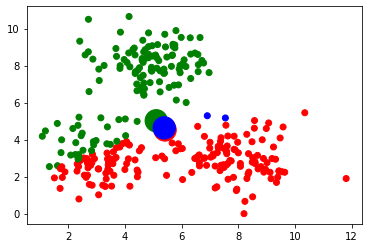

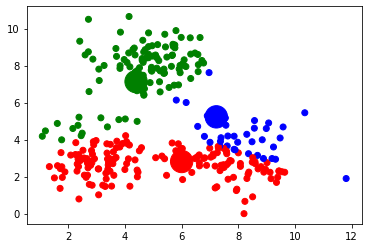

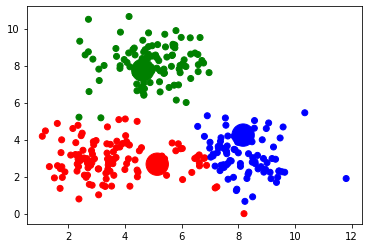

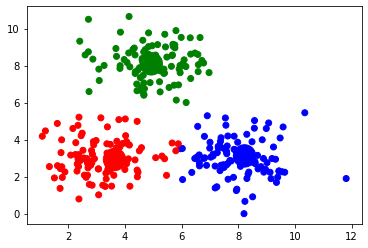

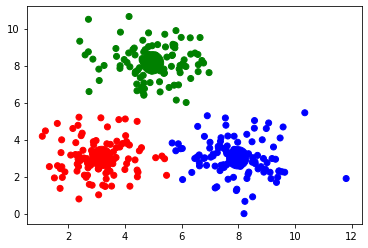

In [6]:
converged = False
#assignments = np.random.choice([1,2,3], size=len(df), replace=True, p=None)
#centroids = [np.mean(df[level==assignments]) for level in [1,2,3]]

k=3
while(converged!=True):
    plot_graph(assignments,centroids)
    centroids=[]
    cluster_levels = [i+1 for i in range(0,k)]
    #Calculate centroid for each cluster level.
    for level in cluster_levels:
        index = level==assignments
        level_points = df[index]
        level_centroid = np.mean(level_points)
        centroids.append(level_centroid)
    centroids=pd.DataFrame(centroids)
    #Loop over points
    #points = [point for point in df.iloc]
    new_assignments = np.array([distances(point,centroids).argmin(axis=0)+1 for point in df.iloc])
    if((new_assignments==assignments).all()):
        converged=True   
    assignments=new_assignments

In [7]:
centroids

,V1,V2
0,3.104574,3.010806
1,4.973649,8.147587
2,7.917699,3.032797
